This notebook will demonstrate the process of using a deep neural network in R to perform image classification.

Necessary libraries:

In [1]:
library(gdata)
library("jpeg")
library("imager")

gdata: Unable to locate valid perl interpreter
gdata: 
gdata: read.xls() will be unable to read Excel XLS and XLSX files
gdata: unless the 'perl=' argument is used to specify the location of a
gdata: valid perl intrpreter.
gdata: 
gdata: (To avoid display of this message in the future, please ensure
gdata: perl is installed and available on the executable search path.)
gdata: Unable to load perl libaries needed by read.xls()
gdata: to support 'XLX' (Excel 97-2004) files.

gdata: Unable to load perl libaries needed by read.xls()
gdata: to support 'XLSX' (Excel 2007+) files.

gdata: Run the function 'installXLSXsupport()'
gdata: to automatically download and install the perl
gdata: libaries needed to support Excel XLS and XLSX formats.

Attaching package: 'gdata'

The following object is masked from 'package:stats':

    nobs

The following object is masked from 'package:utils':

    object.size

The following object is masked from 'package:base':

    startsWith

Loading required packag

We use the following function to load the images:

In [2]:
getFileNameAndExtension <- function(file){ 
    ex <- strsplit(basename(file), split="\\.")
    ex<-unlist(ex)
    return(ex)
}


In [3]:
firstVideoFileName<-'marker.mov'
secondVideoFileName<-'bottle.mov'
outFilePrefix='out'
outFileSuffix='.jpg'
thumbNailFolder<-"Small"

In [4]:
nameAndExtension<-getFileNameAndExtension(firstVideoFileName)
fnames <- paste0(thumbNailFolder,nameAndExtension[[1]],"/","out", 2, ".jpg")
fnames

[1] "Smallmarker/out2.jpg"

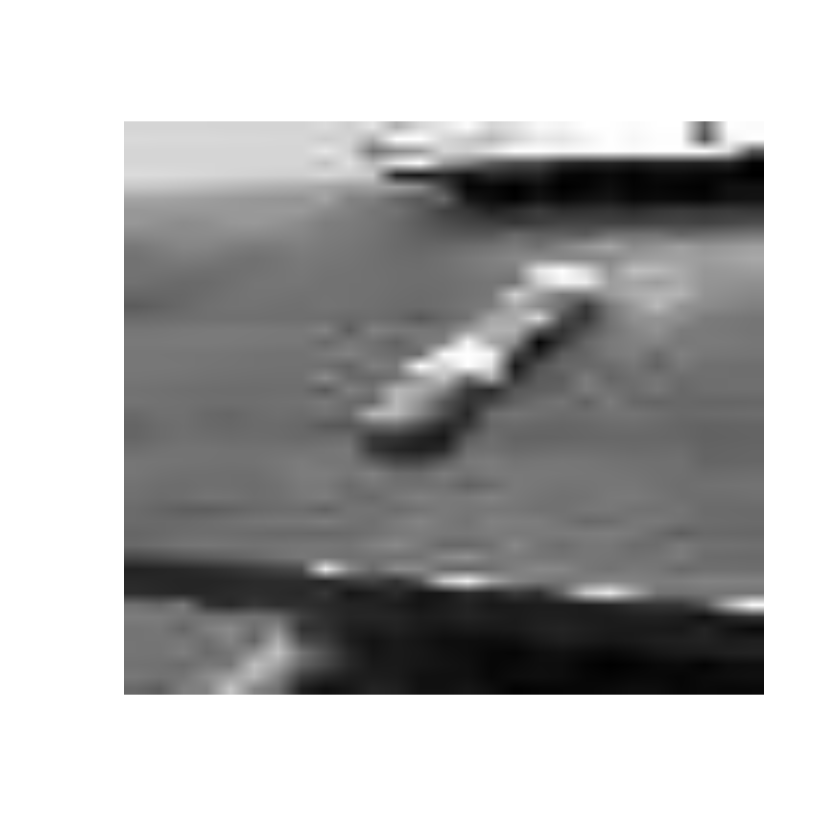

In [5]:
sampleMarker<-readJPEG(fnames,native=TRUE)
plot(0:1,0:1,type="n",ann=FALSE,axes=FALSE)
rasterImage(sampleMarker,0,0,1,1)

In [6]:
nameAndExtension<-getFileNameAndExtension(secondVideoFileName)
fnames <- paste0(thumbNailFolder,nameAndExtension[[1]],"/","out", 2, ".jpg")
fnames

[1] "Smallbottle/out2.jpg"

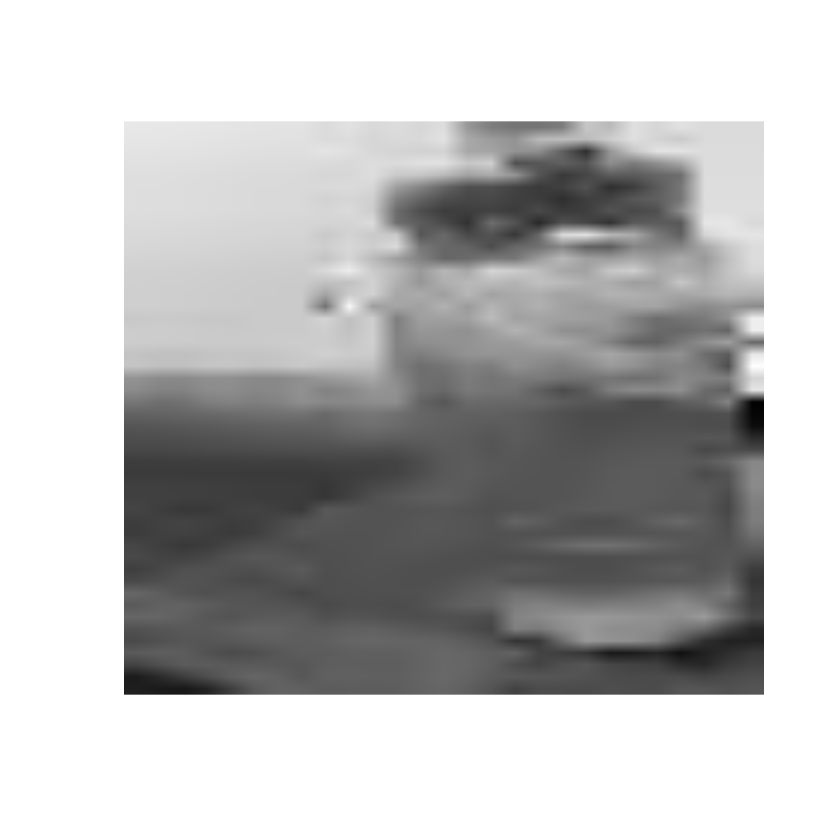

In [7]:
sampleBottle<-readJPEG(fnames,native=TRUE)
plot(0:1,0:1,type="n",ann=FALSE,axes=FALSE)
rasterImage(sampleBottle,0,0,1,1)

We will use the grayscale intensity of each image as the feature input for a neural network.

In [8]:
dim(sampleMarker)

[1] 48 27

In [9]:
gs.matrix<-as.matrix(sampleMarker)
dim(gs.matrix)

[1] 48 27

In [10]:
i.vector<-unmatrix(gs.matrix,byrow=T)
length(i.vector) # unmatrix the gray intensity image as a single column vector, which will be used as feature values to train neural network

[1] 1296

Next we label the images with the following function:

In [11]:
loadImagesfromFolderAndLabel <- function(pathName,prefix, clasLabel) {
imageNames<-paste0(prefix,"*.*")
files<-list.files(path=pathName,pattern=imageNames,all.files=T,full.name=T,no..=T)
list_of_images=lapply(files,load.image)
#list_of_images=lapply(files,read.pnm)
#plot(list_of_images[[1]])
n.images<-length(list_of_images)
thmb.matrix<-as.matrix(list_of_images[[1]])
image.vector<-unmatrix(thmb.matrix,byrow=T)
for(ii in 2:n.images)
{
  thmb.matrix<-as.matrix(list_of_images[[ii]])
  i.vector<-unmatrix(thmb.matrix,byrow=T)
  image.vector<-rbind(image.vector,i.vector)
}
image.frame<-data.frame(image.vector)
n.rows<-nrow(image.frame)
class1.label<-rep(clasLabel,n.rows)
image.frame<-cbind(image.frame,class1.label)
rm(list_of_images)
return (image.frame)
}

We then create the input vectors:

In [12]:
nameAndExtension<-getFileNameAndExtension(firstVideoFileName)
folderName<-paste0(thumbNailFolder,nameAndExtension[[1]])
folderName

[1] "Smallmarker"

In [13]:
class1.frame <- loadImagesfromFolderAndLabel(folderName,outFilePrefix,1)
dim(class1.frame)

[1]  124 1297

In [14]:
nameAndExtension<-getFileNameAndExtension(secondVideoFileName)
folderName<-paste0(thumbNailFolder,nameAndExtension[[1]])
folderName

[1] "Smallbottle"

In [15]:
class2.frame <- loadImagesfromFolderAndLabel(folderName,outFilePrefix,-1)
dim(class2.frame)

[1]  112 1297

In [16]:
total.frame<-rbind(class1.frame,class2.frame)
dim(total.frame)

[1]  236 1297

Then we create a training and test set, using 60% of the images for the training set and 40% for the test set:

In [17]:
train.index<-sample(nrow(total.frame),nrow(total.frame)*0.6)
training.set<-total.frame[train.index,]
training.set

,r1.c1,r1.c2,r1.c3,r1.c4,r1.c5,r1.c6,r1.c7,r1.c8,r1.c9,r1.c10,...,r27.c40,r27.c41,r27.c42,r27.c43,r27.c44,r27.c45,r27.c46,r27.c47,r27.c48,class1.label
i.vector.57,0.8392157,0.8156863,0.8666667,0.8196078,0.8431373,0.8117647,0.6196078,0.6235294,0.5960784,0.5450980,...,0.4627451,0.4039216,0.1254902,0.12156863,0.09803922,0.12156863,0.03529412,0.04705882,0.05882353,1
i.vector.941,0.9019608,0.9019608,0.8941176,0.8862745,0.8784314,0.8745098,0.8666667,0.8666667,0.8784314,0.8431373,...,0.2392157,0.2196078,0.2392157,0.25098039,0.27450980,0.30196078,0.27843137,0.25490196,0.27058824,-1
i.vector.961,0.9098039,0.9019608,0.8941176,0.8823529,0.8745098,0.8705882,0.8705882,0.8705882,0.8705882,0.8470588,...,0.2352941,0.2274510,0.2392157,0.24313725,0.27058824,0.29803922,0.28235294,0.25882353,0.27058824,-1
i.vector.58,0.8274510,0.8313725,0.8470588,0.8352941,0.8470588,0.6392157,0.6431373,0.6196078,0.5843137,0.5333333,...,0.4901961,0.2745098,0.1019608,0.10588235,0.10980392,0.14509804,0.03921569,0.07450980,0.05490196,1
i.vector.421,0.9137255,0.9098039,0.9019608,0.8941176,0.8823529,0.8745098,0.8705882,0.8666667,0.8588235,0.8549020,...,0.2980392,0.2627451,0.2470588,0.23137255,0.21960784,0.20392157,0.19607843,0.21176471,0.23921569,-1
i.vector.70,0.8666667,0.8431373,0.8392157,0.8352941,0.8705882,0.6627451,0.6392157,0.5843137,0.5647059,0.5254902,...,0.4588235,0.2274510,0.1176471,0.09803922,0.12941176,0.09019608,0.05490196,0.05882353,0.05490196,1
i.vector.681,0.9176471,0.9137255,0.9058824,0.8980392,0.8901961,0.8784314,0.8745098,0.8705882,0.8627451,0.8588235,...,0.2509804,0.2156863,0.2274510,0.23529412,0.24313725,0.26666667,0.29019608,0.29411765,0.28235294,-1
i.vector.68,0.8470588,0.8588235,0.8431373,0.8549020,0.8745098,0.7882353,0.6627451,0.6313725,0.5686275,0.5333333,...,0.4549020,0.2901961,0.1019608,0.13725490,0.09019608,0.11764706,0.04313725,0.04705882,0.04705882,1
i.vector.761,0.9137255,0.9098039,0.9019608,0.8941176,0.8823529,0.8745098,0.8705882,0.8666667,0.8509804,0.8470588,...,0.2549020,0.1960784,0.2235294,0.23529412,0.25490196,0.28235294,0.27450980,0.25490196,0.26666667,-1
i.vector.661,0.9176471,0.9137255,0.9058824,0.8980392,0.8901961,0.8784314,0.8745098,0.8705882,0.8705882,0.8666667,...,0.2588235,0.2117647,0.2196078,0.22745098,0.26274510,0.30588235,0.29803922,0.27058824,0.28235294,-1


In [18]:
test.set<-total.frame[-train.index,]
test.set

,r1.c1,r1.c2,r1.c3,r1.c4,r1.c5,r1.c6,r1.c7,r1.c8,r1.c9,r1.c10,...,r27.c40,r27.c41,r27.c42,r27.c43,r27.c44,r27.c45,r27.c46,r27.c47,r27.c48,class1.label
i.vector.7,0.8549020,0.8431373,0.8745098,0.8196078,0.6784314,0.6274510,0.6156863,0.5411765,0.5254902,0.4980392,...,0.11764706,0.1137255,0.12941176,0.11764706,0.06666667,0.03921569,0.05098039,0.06274510,0.05882353,1
i.vector.9,0.8705882,0.8431373,0.8666667,0.8196078,0.6705882,0.6196078,0.6313725,0.5843137,0.5098039,0.4941176,...,0.12156863,0.1254902,0.14117647,0.12156863,0.07058824,0.04313725,0.05490196,0.07058824,0.06666667,1
i.vector.10,0.8549020,0.8392157,0.8705882,0.8196078,0.6627451,0.6078431,0.6235294,0.5882353,0.5058824,0.4823529,...,0.09411765,0.1254902,0.14117647,0.12156863,0.07058824,0.04313725,0.05490196,0.07058824,0.06666667,1
i.vector.11,0.8549020,0.8352941,0.8274510,0.8196078,0.8666667,0.6784314,0.6588235,0.5960784,0.5529412,0.5215686,...,0.60784314,0.1843137,0.11764706,0.10588235,0.12941176,0.10196078,0.06274510,0.05098039,0.05098039,1
i.vector.14,0.8745098,0.8196078,0.8784314,0.8000000,0.6509804,0.6235294,0.5960784,0.5725490,0.5137255,0.4941176,...,0.12156863,0.1176471,0.13333333,0.11764706,0.06666667,0.03529412,0.05098039,0.06666667,0.06274510,1
i.vector.15,0.8627451,0.8352941,0.8627451,0.8117647,0.6666667,0.6156863,0.6274510,0.5803922,0.5098039,0.4823529,...,0.09019608,0.1176471,0.13333333,0.11764706,0.06666667,0.03529412,0.05098039,0.06666667,0.06274510,1
i.vector.17,0.8627451,0.8392157,0.8666667,0.8117647,0.6588235,0.6000000,0.6117647,0.5725490,0.4941176,0.4862745,...,0.11764706,0.1176471,0.13725490,0.10588235,0.05490196,0.04705882,0.04705882,0.05490196,0.08235294,1
i.vector.22,0.8392157,0.8274510,0.8274510,0.8235294,0.8705882,0.6784314,0.6509804,0.5803922,0.5529412,0.5215686,...,0.50196078,0.1764706,0.12156863,0.10980392,0.12549020,0.09803922,0.06666667,0.05490196,0.04705882,1
i.vector.24,0.8627451,0.8274510,0.8705882,0.8235294,0.6549020,0.6000000,0.6235294,0.5647059,0.5019608,0.4980392,...,0.07450980,0.1098039,0.13725490,0.05490196,0.03921569,0.05098039,0.03529412,0.07058824,0.05490196,1
i.vector.25,0.8431373,0.8784314,0.8431373,0.8313725,0.6823529,0.5803922,0.6431373,0.5333333,0.5019608,0.5019608,...,0.10588235,0.1254902,0.11372549,0.06666667,0.03529412,0.04705882,0.04705882,0.05098039,0.07058824,1


Next we train the neural network, using one hidden layer, 20 hidden nodes, and 500 repetitions:

In [19]:
library(neuralnet)
myform <- as.formula(paste('class1.label ~ ',paste(names(training.set[!names(training.set) %in% 'class1.label']), collapse = ' + ')))
oneHiddenLayerClassifier <- neuralnet(myform, training.set, hidden = 20, rep=500, linear.output = FALSE, threshold = 0.01)
summary(oneHiddenLayerClassifier)

                    Length   Class      Mode    
call                       7 -none-     call    
response                 141 -none-     numeric 
covariate             182736 -none-     numeric 
model.list                 2 -none-     list    
err.fct                    1 -none-     function
act.fct                    1 -none-     function
linear.output              1 -none-     logical 
data                    1297 data.frame list    
exclude                    0 -none-     NULL    
net.result               500 -none-     list    
weights                  500 -none-     list    
generalized.weights      500 -none-     list    
startweights             500 -none-     list    
result.matrix       12982000 -none-     numeric 

Next we make classification predictions:



In [20]:
class.index<-length(test.set)
predictionResults<-compute(oneHiddenLayerClassifier,test.set[,-class.index])
predictionResults$net.result

i.vector.7,0.9902013
i.vector.9,0.9888197
i.vector.10,0.9912318
i.vector.11,0.9924009
i.vector.14,0.9914549
i.vector.15,0.9920879
i.vector.17,0.9911919
i.vector.22,0.9922836
i.vector.24,0.9911527
i.vector.25,0.9899471
i.vector.26,0.9841650


In [21]:
classifications<-ifelse(predictionResults$net.result>0.5,1,-1)
classifications

i.vector.7,1
i.vector.9,1
i.vector.10,1
i.vector.11,1
i.vector.14,1
i.vector.15,1
i.vector.17,1
i.vector.22,1
i.vector.24,1
i.vector.25,1
i.vector.26,1


In [22]:
table(test.set[,class.index],classifications)

    classifications
     -1  1
  -1 51  0
  1   0 44

Classification accuracy: 100%


For a performance comparison on the test set, we will train a second deep neural network with two hidden layers with a 5x4 set of hidden nodes in each layer:

In [23]:
myform <- as.formula(paste('class1.label ~ ',paste(names(training.set[!names(training.set) %in% 'class1.label']), collapse = ' + ')))
twoHiddenLayerClassifier <- neuralnet(myform, training.set, hidden = c(5, 4), rep=500, linear.output = FALSE, threshold = 0.01)
summary(twoHiddenLayerClassifier)

                    Length  Class      Mode    
call                      7 -none-     call    
response                141 -none-     numeric 
covariate            182736 -none-     numeric 
model.list                2 -none-     list    
err.fct                   1 -none-     function
act.fct                   1 -none-     function
linear.output             1 -none-     logical 
data                   1297 data.frame list    
exclude                   0 -none-     NULL    
net.result              500 -none-     list    
weights                 500 -none-     list    
generalized.weights     500 -none-     list    
startweights            500 -none-     list    
result.matrix       3258500 -none-     numeric 

In [24]:
class.index<-length(test.set)
predictionResults<-compute(twoHiddenLayerClassifier,test.set[,-class.index])
predictionResults$net.result

i.vector.7,0.9890757
i.vector.9,0.9890757
i.vector.10,0.9890757
i.vector.11,0.9890757
i.vector.14,0.9890757
i.vector.15,0.9890757
i.vector.17,0.9890757
i.vector.22,0.9890757
i.vector.24,0.9890757
i.vector.25,0.9890757
i.vector.26,0.9890757


In [25]:
classifications<-ifelse(predictionResults$net.result>0.5,1,-1)
classifications

i.vector.7,1
i.vector.9,1
i.vector.10,1
i.vector.11,1
i.vector.14,1
i.vector.15,1
i.vector.17,1
i.vector.22,1
i.vector.24,1
i.vector.25,1
i.vector.26,1


In [26]:
table(test.set[,class.index],classifications)

    classifications
     -1  1
  -1 51  0
  1   0 44

Classification accuracy: 100%

So, there is no benefit to increasing complexity of the deep neural network for a toy classification problem this small.